In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "grey1": "#aeb7bc",
    "grey2": "#c3cace",
    "grey3": "#d9dde0",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main.values())
sns.set_palette(_30k)

# ← → ↓ ↑


def _30k_path_effects(linewidth=2.5, foreground=_30k_text['bg_cream'], alpha=1.0, **kwargs):
    return [patheffects.withStroke(linewidth=linewidth, foreground=foreground, alpha=alpha, **kwargs)]

import warnings

warnings.filterwarnings('ignore')

In [2]:
from utils.puzzle import *

# What P1 knows

In [3]:
n = 6

board, key, key_pos = generate_board(n)

print(f"""
board size: {2**n}, {board.shape}
the key is at the postition: {key_pos}, {to_binary_string(n, key_pos)}
""")


board size: 64, (8, 8)
the key is at the postition: 26, 011010



# Generate Thing to visualise

In [4]:
ht_cmap = [_30k_text['grey3'], _30k_main['blue']]
mask_cmap = [_30k_text['bg_cream'], _30k_main['yellow']]
mask_alpha = 0.3

In [5]:
# board position, for annotation
postion_arr = np.reshape(np.arange(2**n), board.shape)

In [6]:
# key masking overlay
key_mask = np.where(key==0, np.nan, 1)

In [7]:
# position in base 2
bin_position_arr = np.array(generate_binary_position_array(n))

In [8]:
bin_masking_arr = generate_pairity_masking(n)

for key in bin_masking_arr.keys():
    bin_masking_arr[key] = np.reshape(bin_masking_arr[key], board.shape)

# P1 Play the game

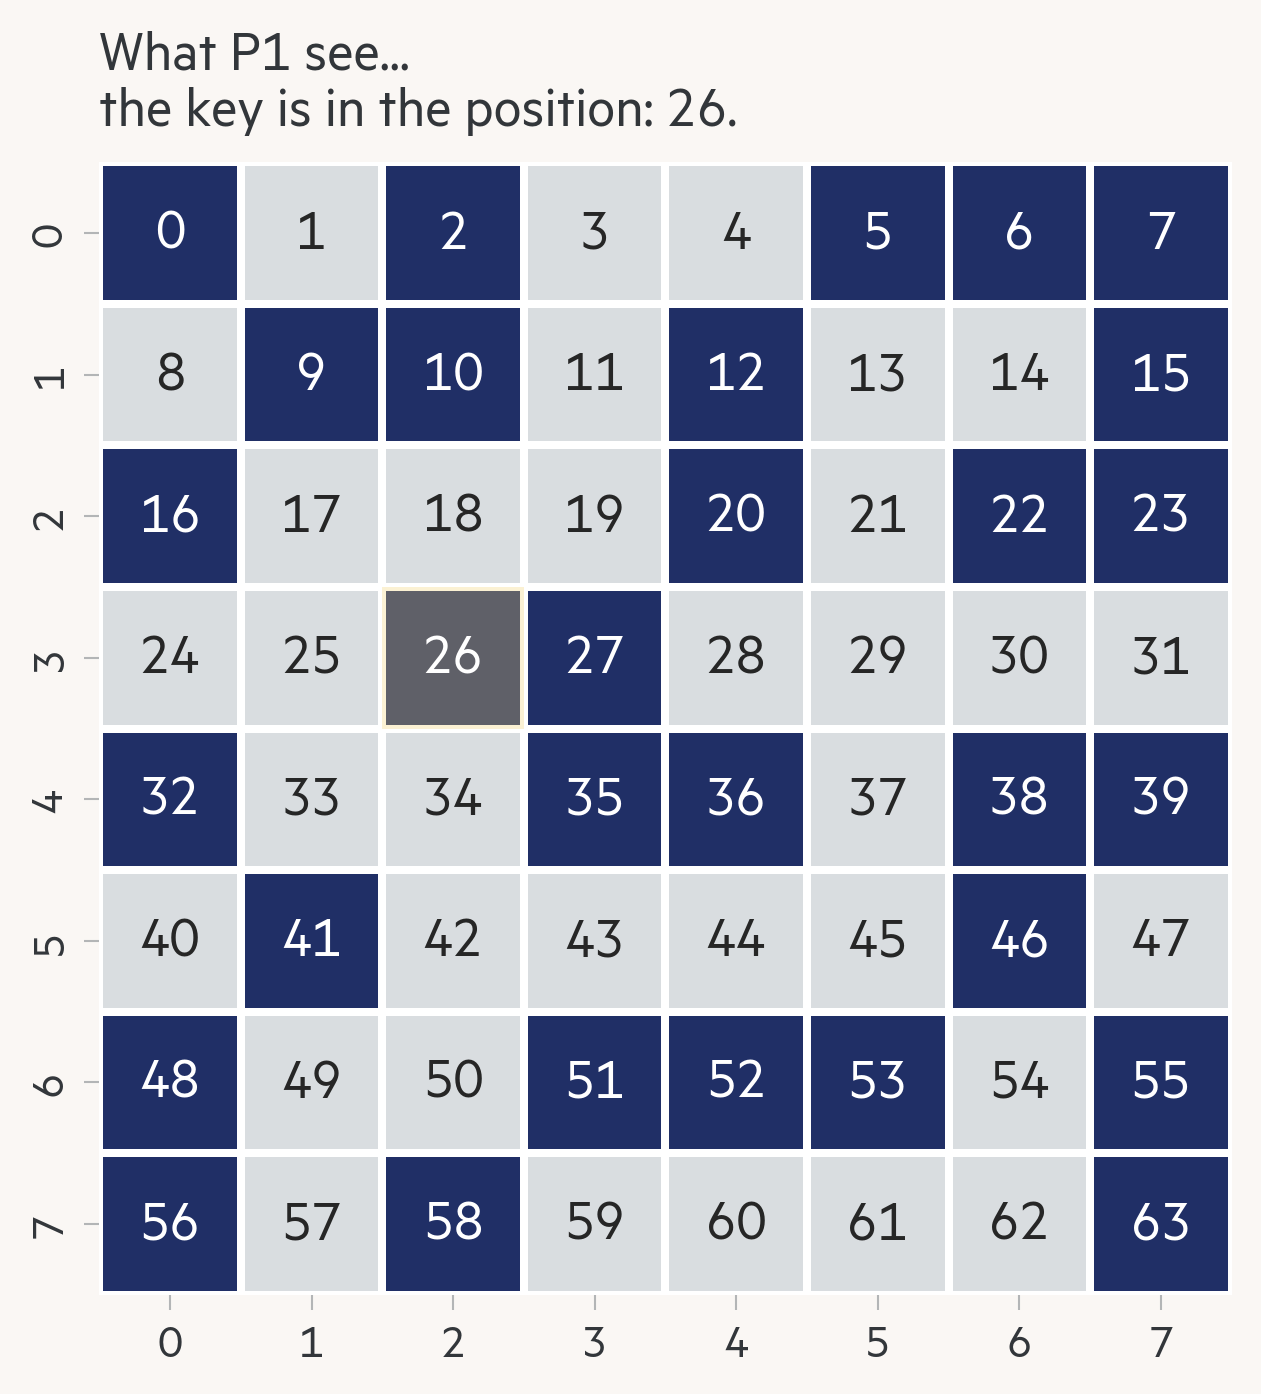

In [9]:
sns.heatmap(board, linewidths=1.5, 
            annot=postion_arr, 
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False)

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1)

plt.title(f"What P1 see...\nthe key is in the position: {key_pos}.")

ax = plt.gca()

# ax.set_suptitle(x=0.25, y=1.2, t=f"Initial state:", ha='left', va='bottom', fontsize='x-large')


plt.show()

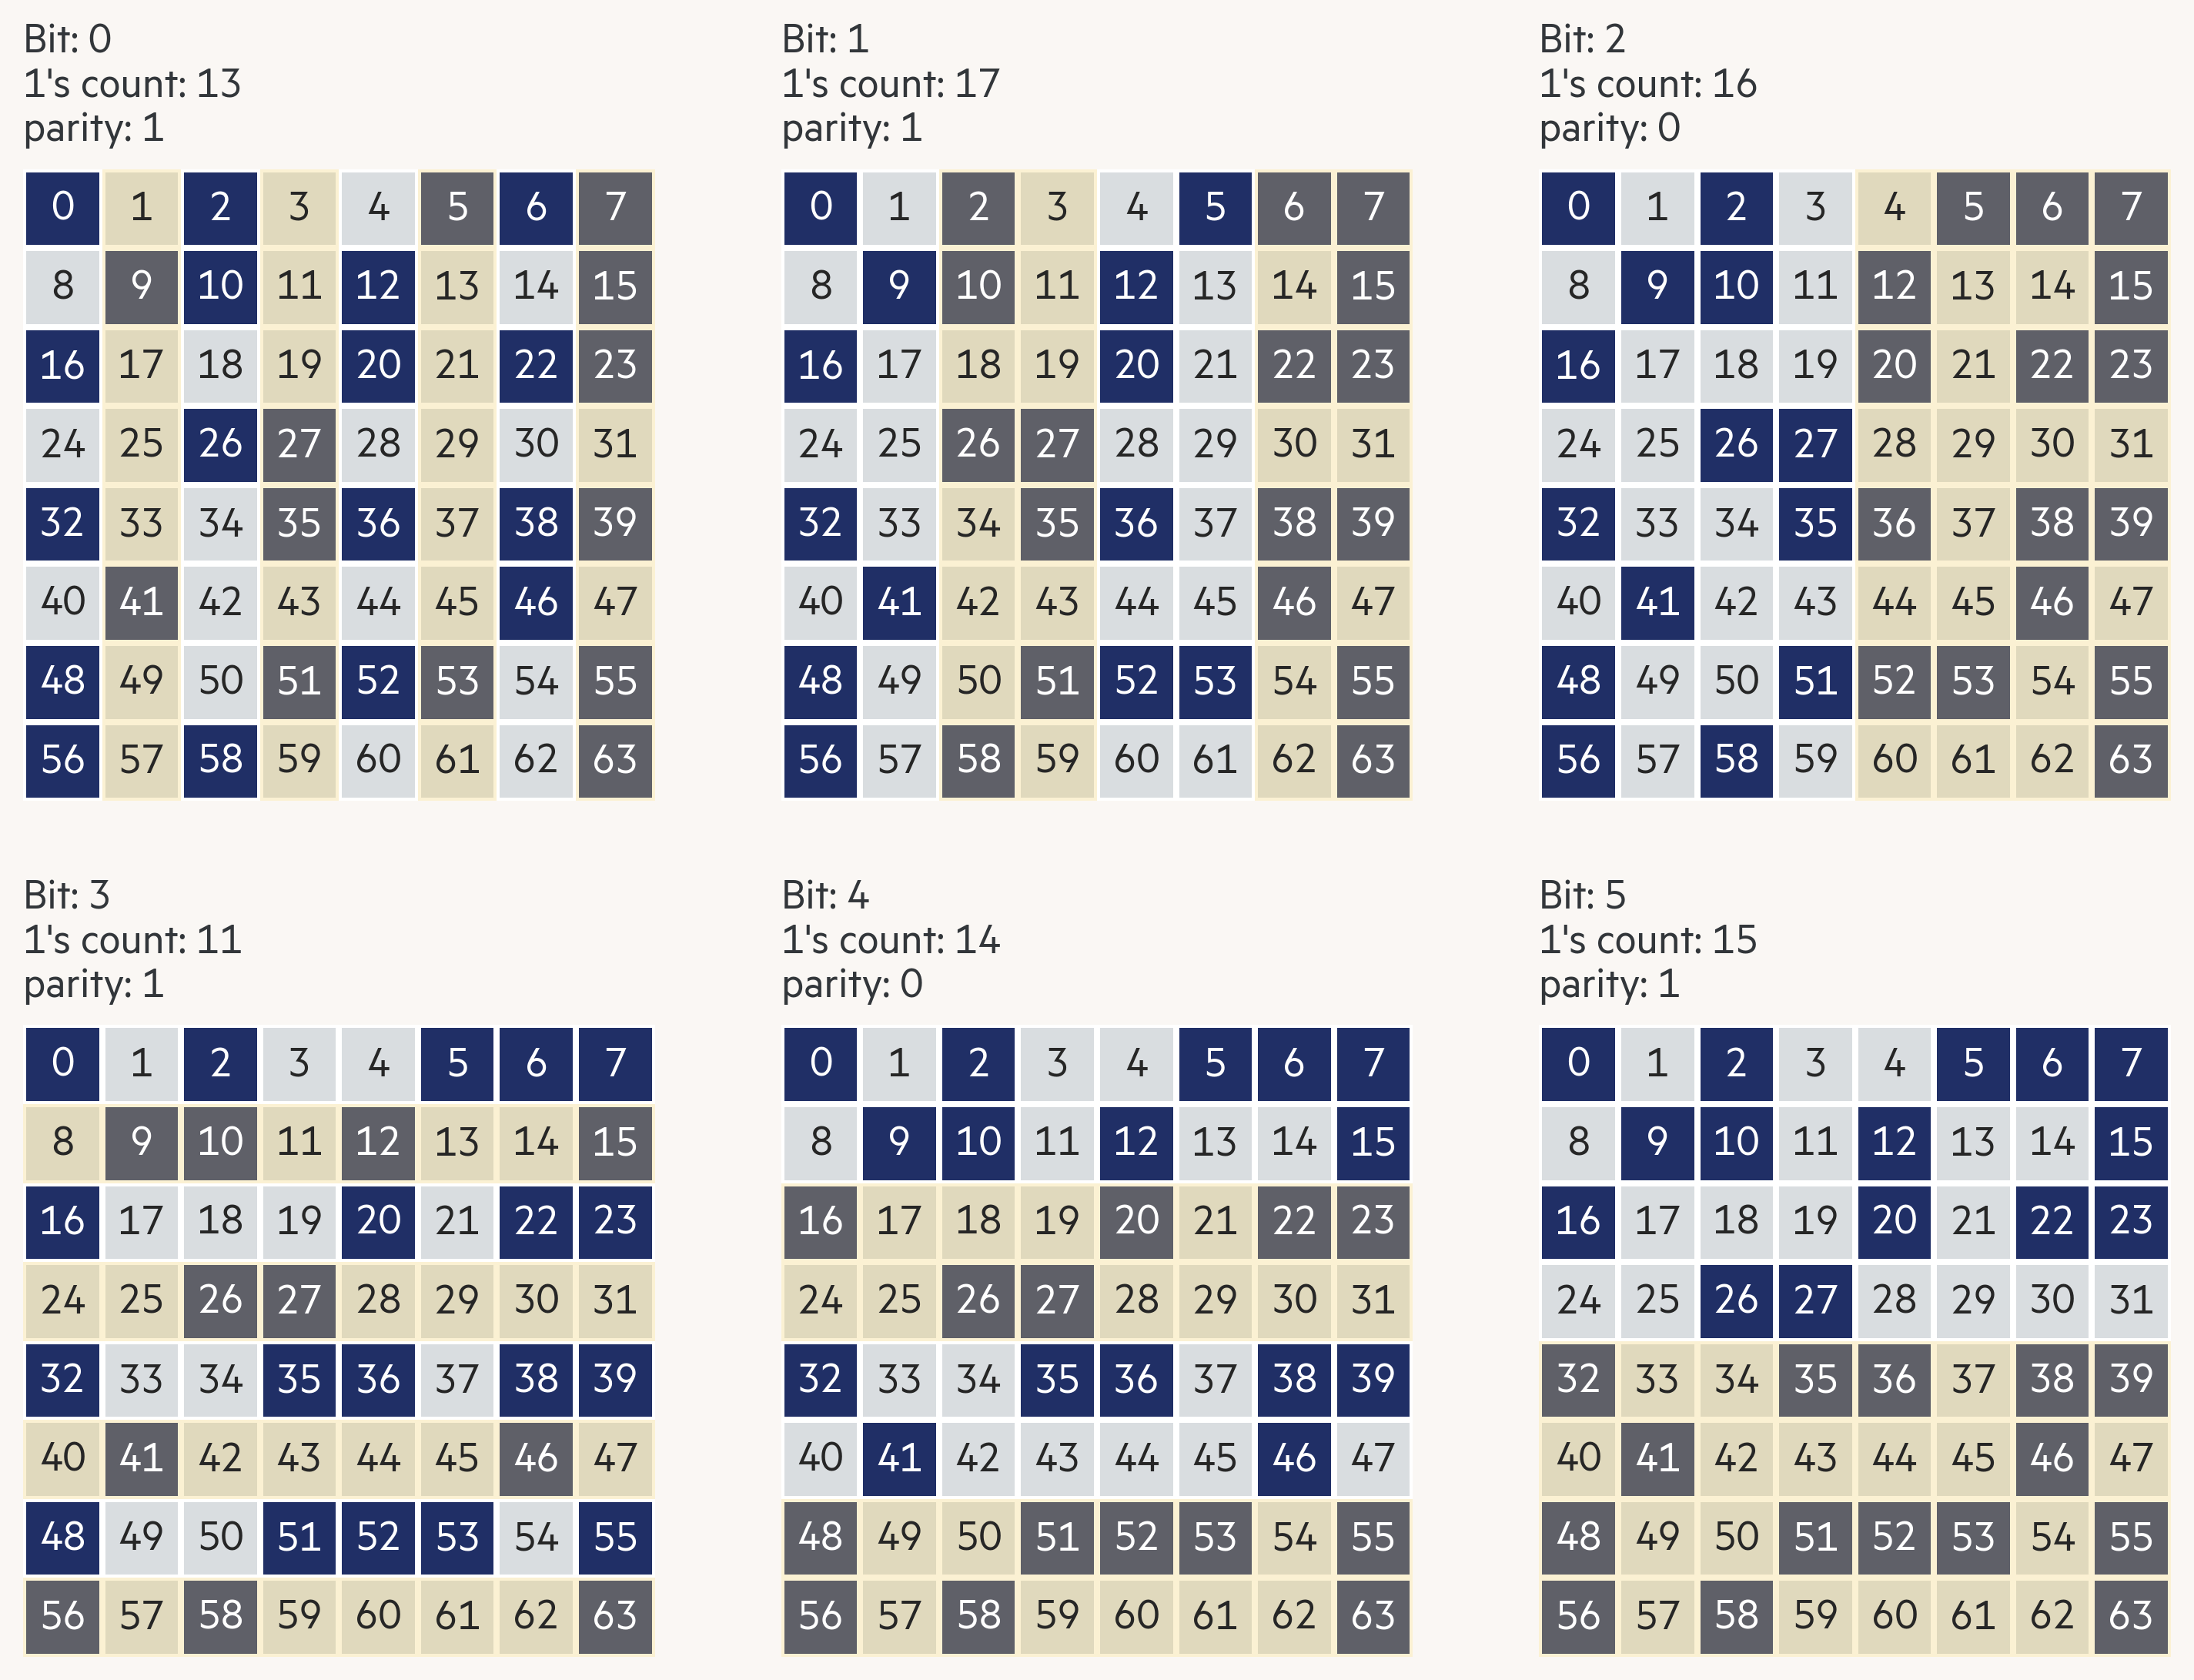

In [10]:
parity_bits = ""

ncols = n//2
nrows = int(np.ceil(n/ncols))

w = 6
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w*nrows, (w/2)*ncols))
axs = np.reshape(axs, (nrows*ncols))

for i, ax in enumerate(axs):
    
    if i in bin_masking_arr.keys():
        sns.heatmap(board, linewidths=1.5, 
                    annot=postion_arr, 
                    vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[i])

        sns.heatmap(bin_masking_arr[i], alpha=mask_alpha, 
                    cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[i])
    
        count_head = int(np.nansum(bin_masking_arr[i] * board))
        parity = count_head % 2
        axs[i].set_title(f"Bit: {i}\n1's count: {count_head}\nparity: {parity}")
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        parity_bits += str(parity)
    else:
        axs[i].set_visible(False)

plt.show()

parity_bits = parity_bits[::-1]

In [11]:
print(f"Now, P1 have encoded the parity bits: {parity_bits} - {int(parity_bits, base=2)}")
print(f"But P1 need to encode the key position: {to_binary_string(n, key_pos)} - {key_pos}")

pos_to_flip = int(parity_bits, base=2) ^ key_pos # XOR

print(f"""
{parity_bits} - {int(parity_bits, base=2)} (the current board parity)
{to_binary_string(n, key_pos)} - {key_pos} (the key position)
{to_binary_string(n, pos_to_flip)} - {pos_to_flip} (need to flip this position)
""")

Now, P1 have encoded the parity bits: 101011 - 43
But P1 need to encode the key position: 011010 - 26

101011 - 43 (the current board parity)
011010 - 26 (the key position)
110001 - 49 (need to flip this position)



# P1 flip the coin

In [12]:
r, c = np.where(postion_arr==pos_to_flip)
r, c = r[0], c[0]

In [13]:
board_flip = board.copy()
board_flip[r, c] = int(not(board_flip[r, c]))

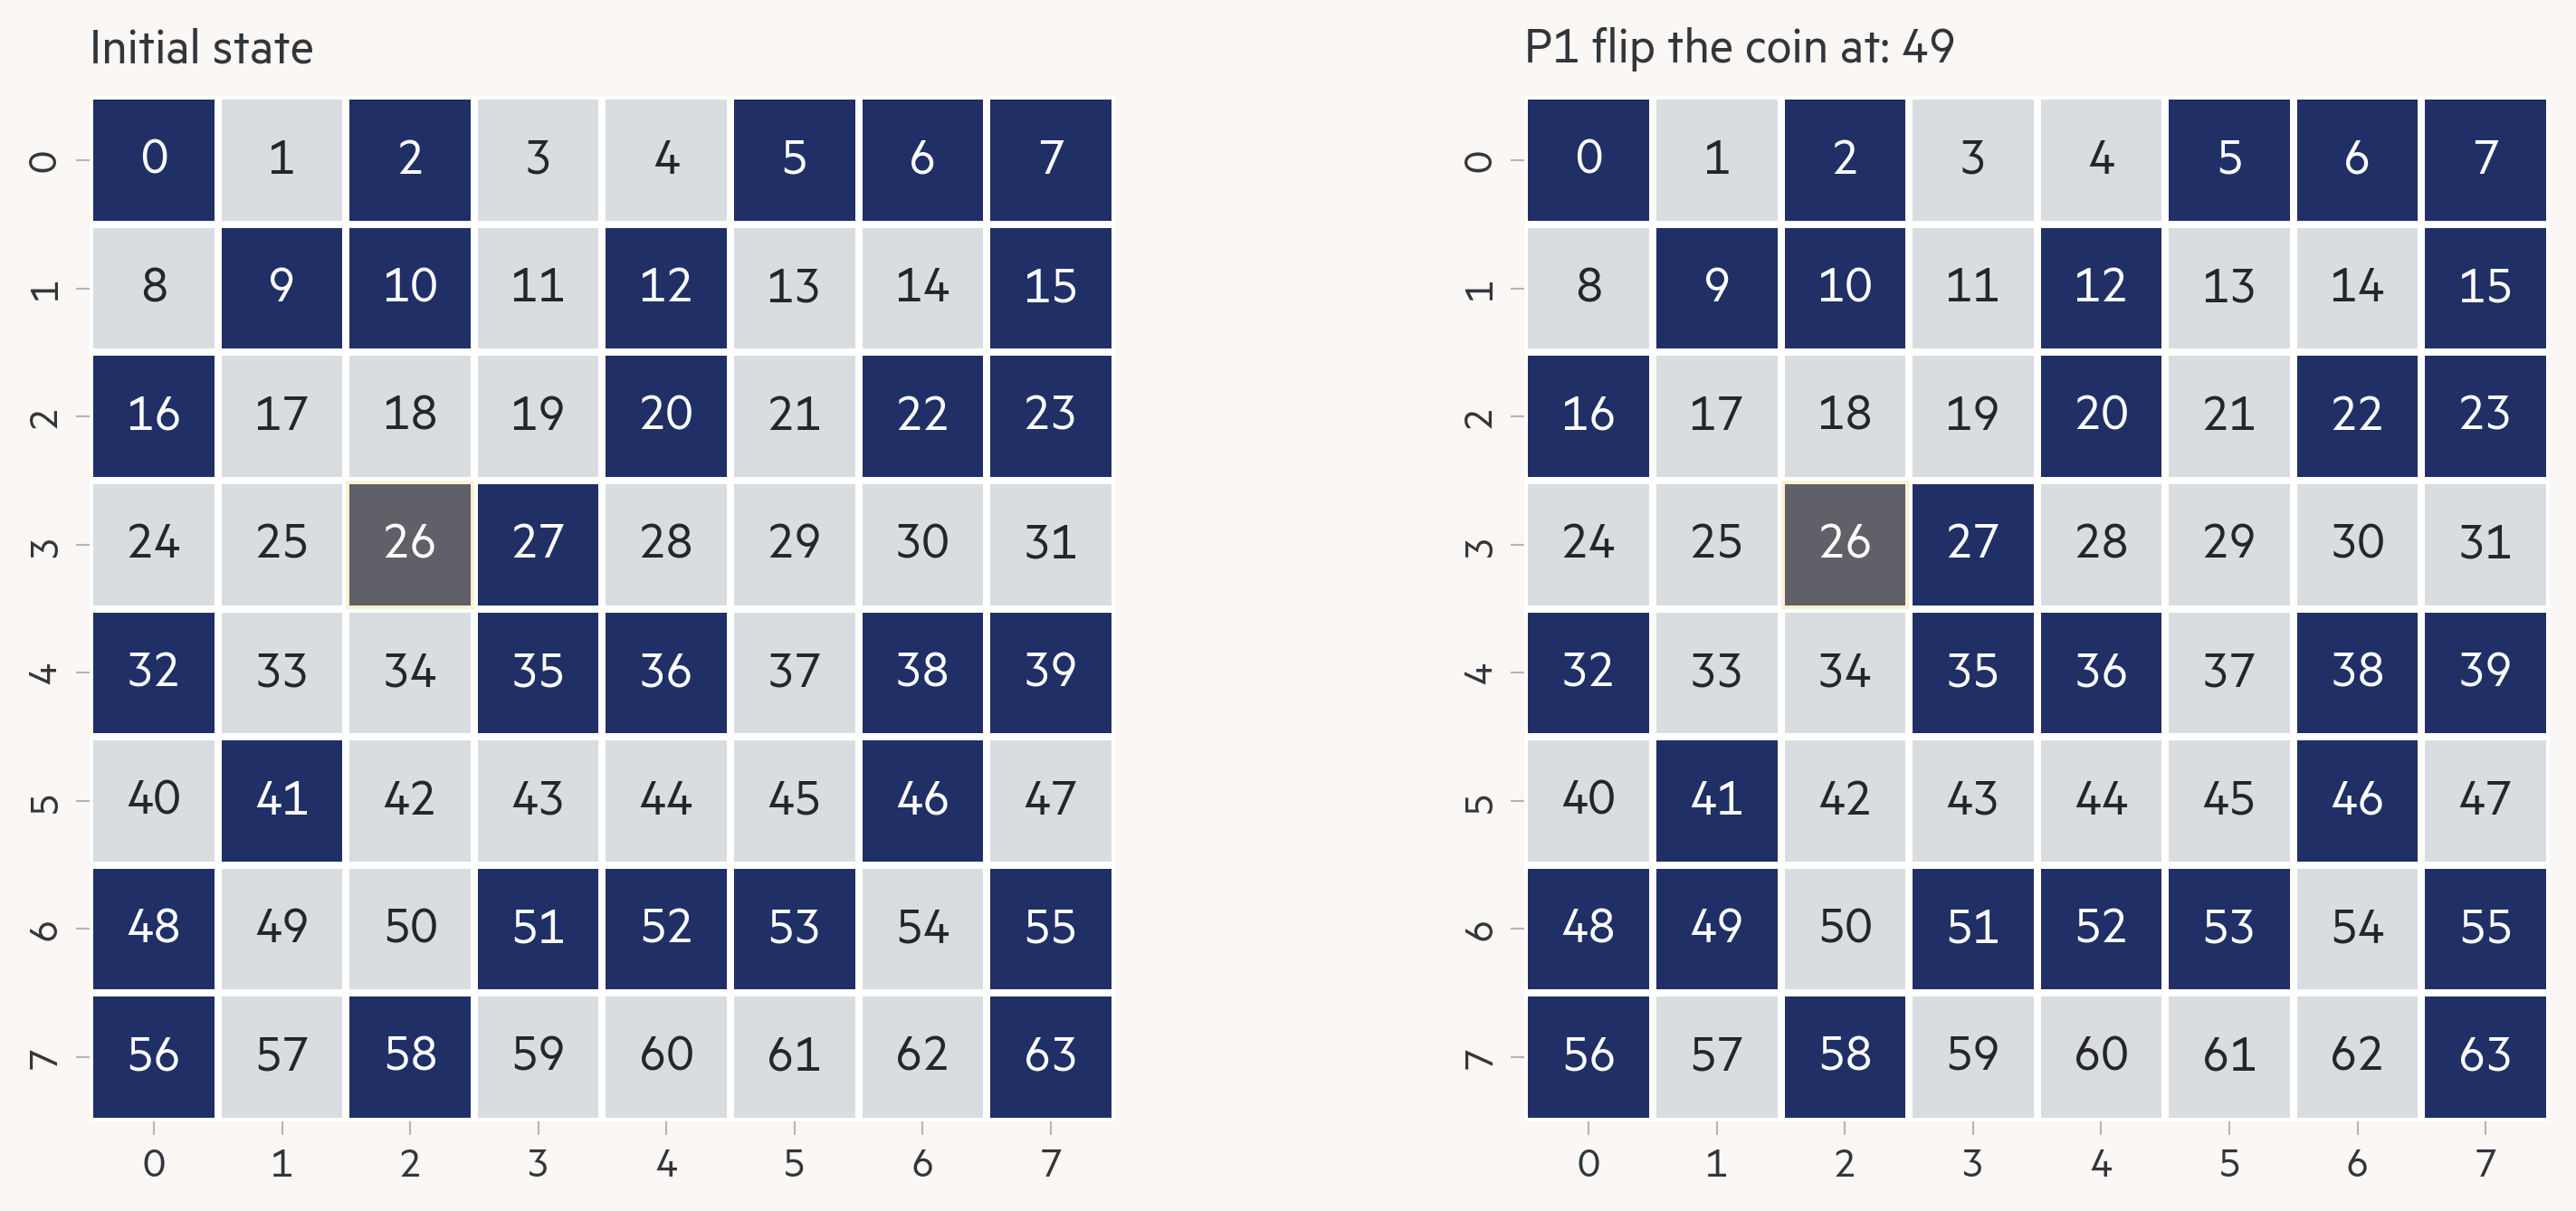

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2)

sns.heatmap(board, linewidths=1.5, 
            annot=postion_arr, 
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[0])

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[0])

sns.heatmap(board_flip, linewidths=1.5, 
            annot=postion_arr, 
            vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[1])

sns.heatmap(key_mask, alpha=mask_alpha, 
            cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[1])

axs[0].set_title(f"Initial state")
axs[1].set_title(f"P1 flip the coin at: {pos_to_flip}")

plt.show()

# P2 play the game

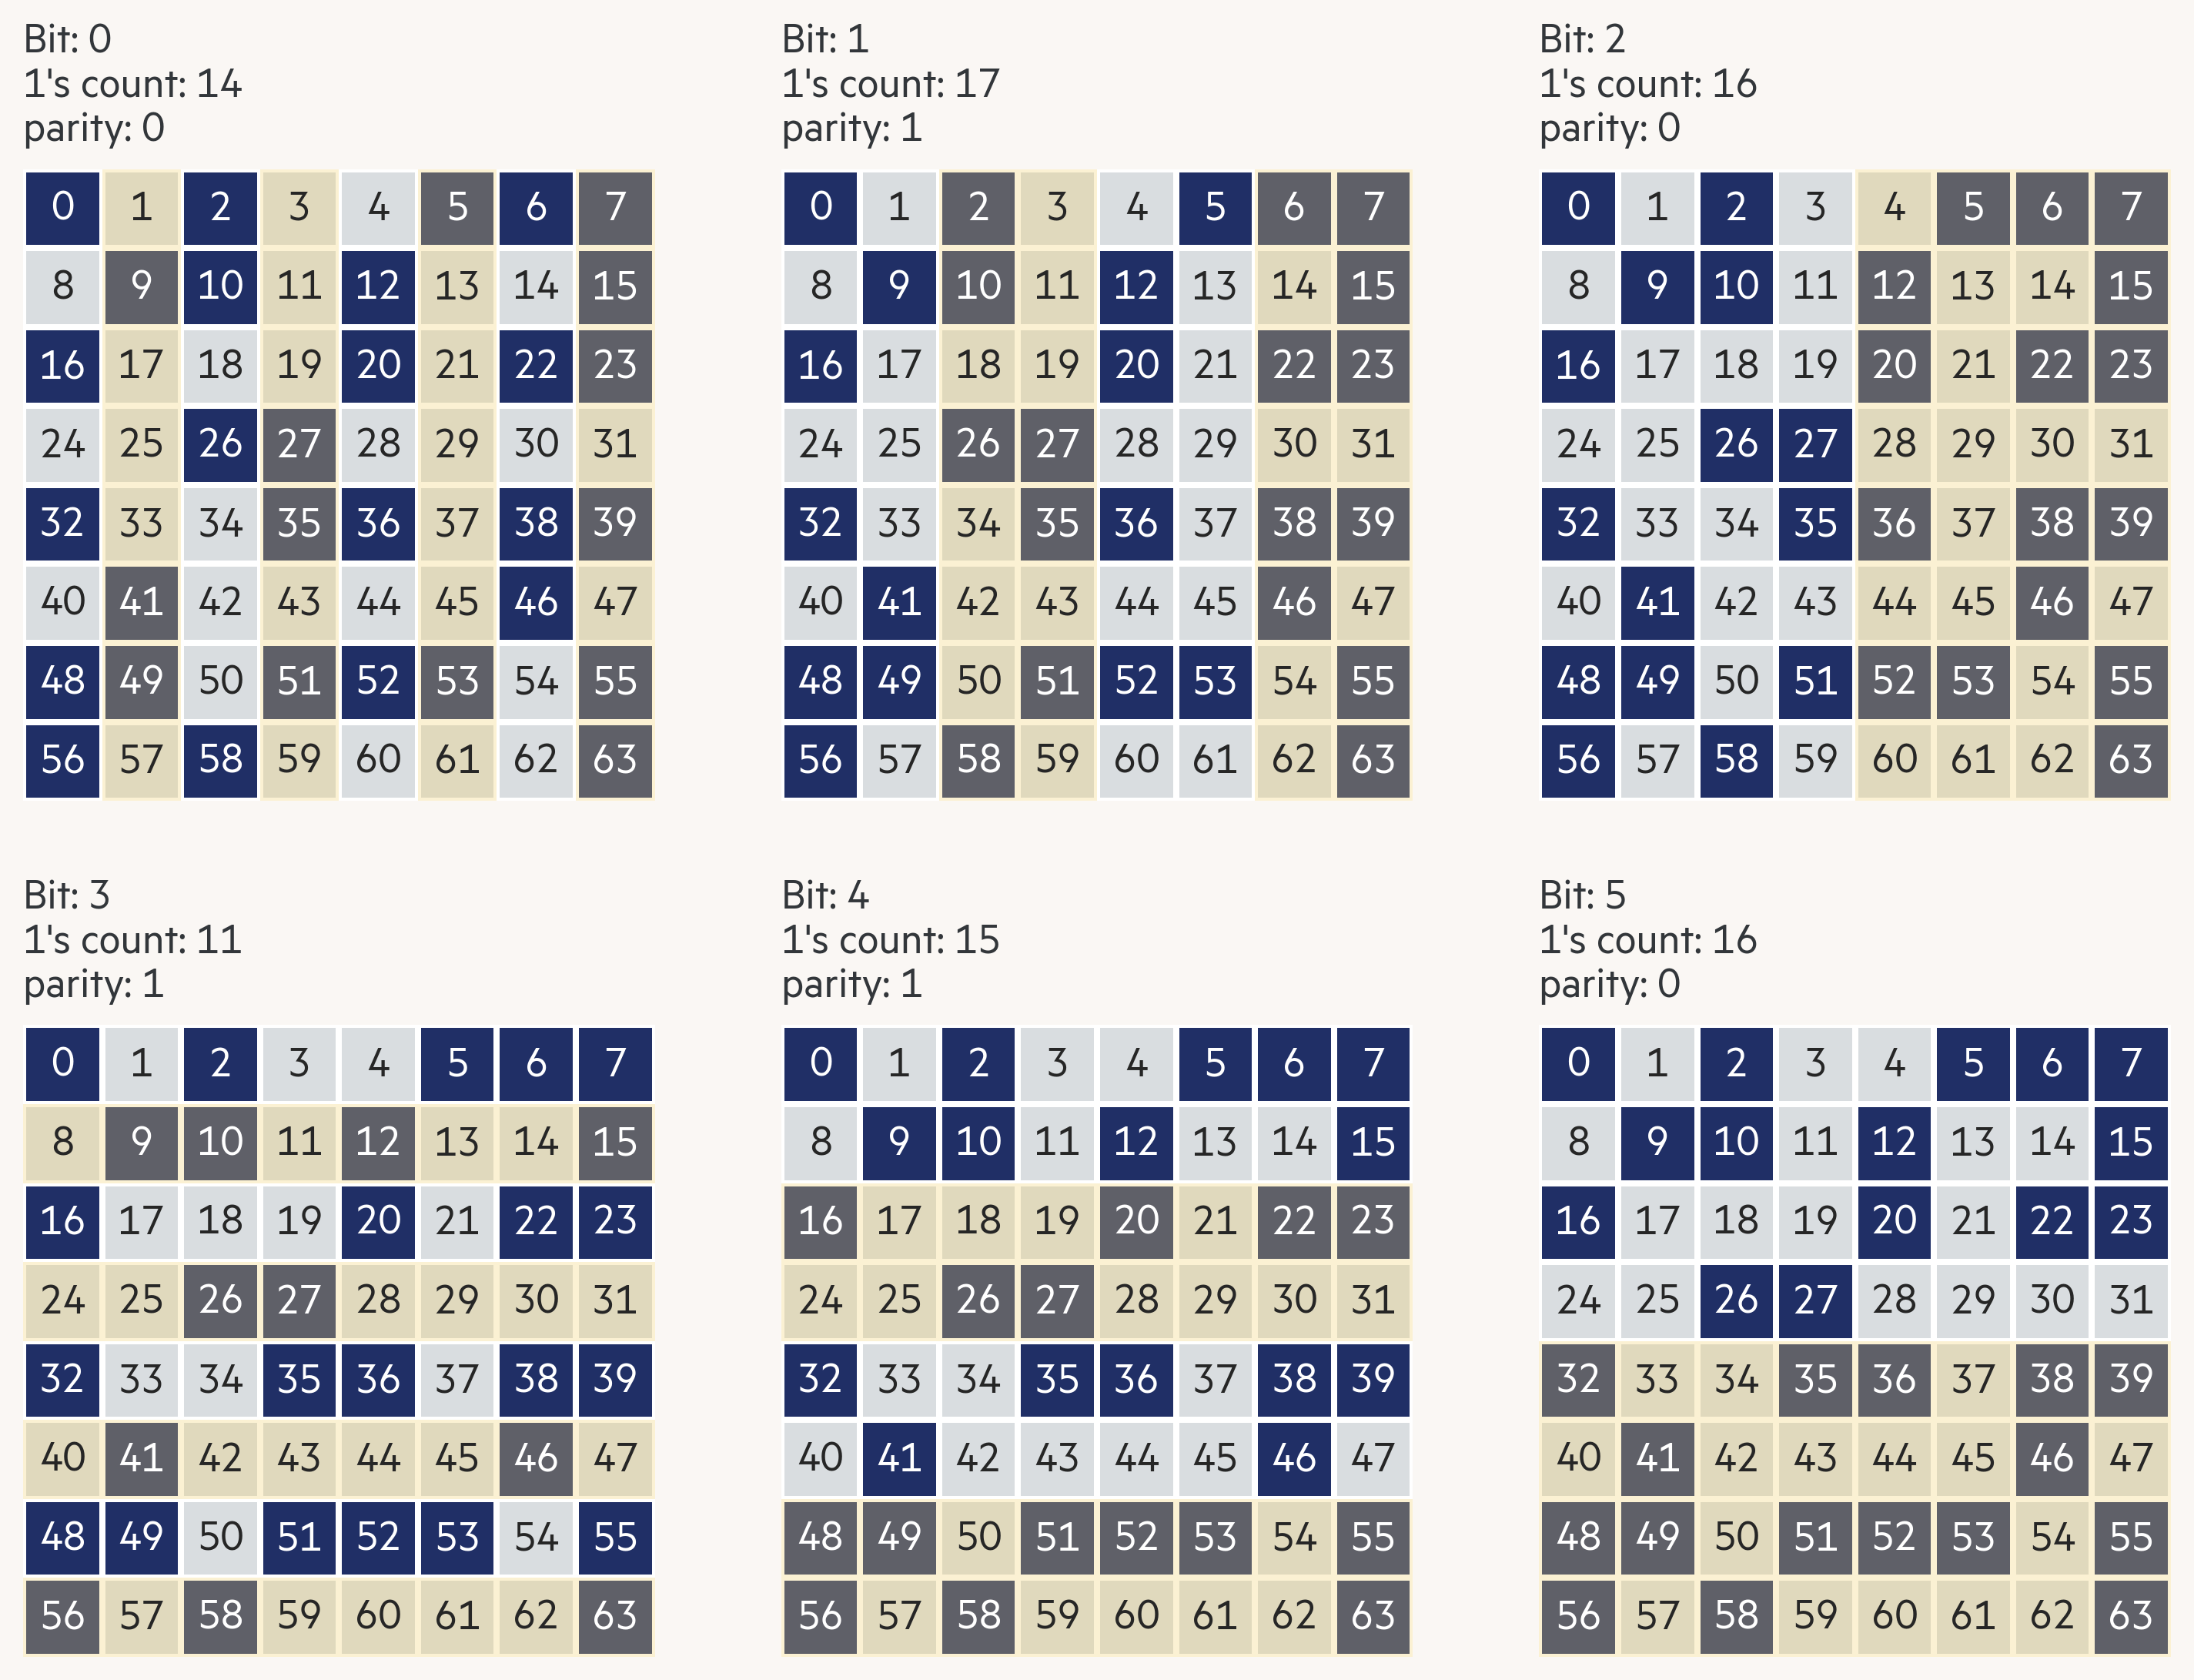

In [15]:
flipped_parity_bits = ""

ncols = n//2
nrows = int(np.ceil(n/ncols))

w = 6
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(w*nrows, (w/2)*ncols))
axs = np.reshape(axs, (nrows*ncols))

for i, ax in enumerate(axs):
    
    if i in bin_masking_arr.keys():
        sns.heatmap(board_flip, linewidths=1.5, 
                    annot=postion_arr, 
                    vmin=0, vmax=1, cmap=ht_cmap, square=True, cbar=False, ax=axs[i])

        sns.heatmap(bin_masking_arr[i], alpha=mask_alpha, 
                    cmap=mask_cmap, cbar=False, vmin=0, vmax=1, ax=axs[i])
    
        count_head = int(np.nansum(bin_masking_arr[i] * board_flip))
        pair = count_head % 2
        axs[i].set_title(f"Bit: {i}\n1's count: {count_head}\nparity: {pair}")
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        flipped_parity_bits += str(pair)
    else:
        axs[i].set_visible(False)

plt.show()
flipped_parity_bits = flipped_parity_bits[::-1]

In [16]:
print(f"P2 know P1's encoded information: {flipped_parity_bits} - {int(flipped_parity_bits, base=2)}")
print(f"The key is at {key_pos}")

P2 know P1's encoded information: 011010 - 26
The key is at 26
